In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medi = pd.read_csv("/content/Medical cost.csv")

In [3]:
medi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medi.shape

(1338, 7)

In [5]:
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
medi.duplicated().sum()

1

In [16]:
numrical_features = medi.select_dtypes(include='int').columns
categorical_features = medi.select_dtypes(include='object').columns

print("numrical_features:",numrical_features)
print("categorical_features:",categorical_features)

numrical_features: Index(['age', 'children'], dtype='object')
categorical_features: Index(['sex', 'smoker', 'region'], dtype='object')


In [11]:
medi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: ylabel='charges'>

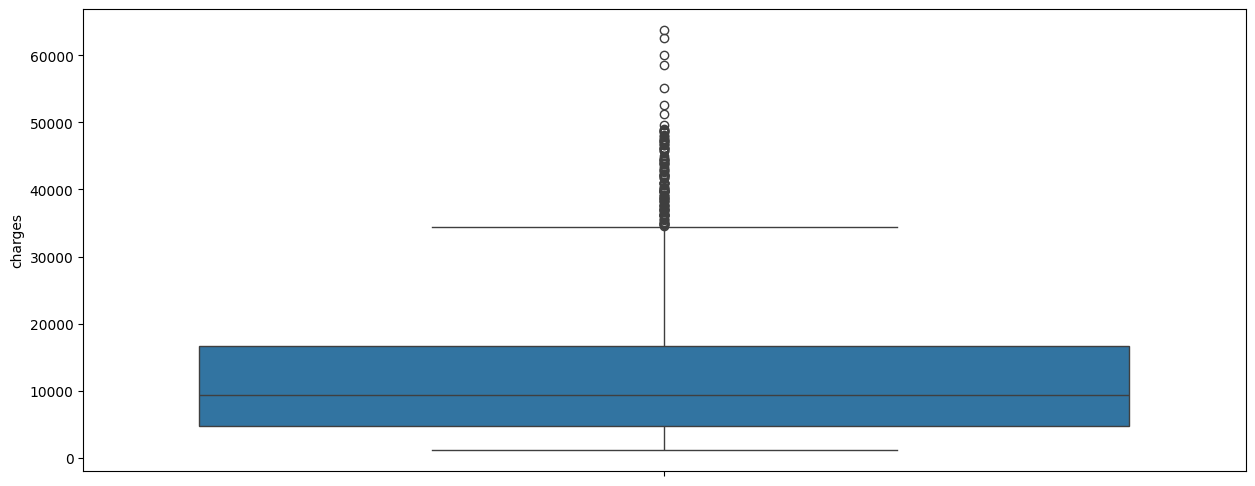

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(medi['charges'])

<Axes: ylabel='bmi'>

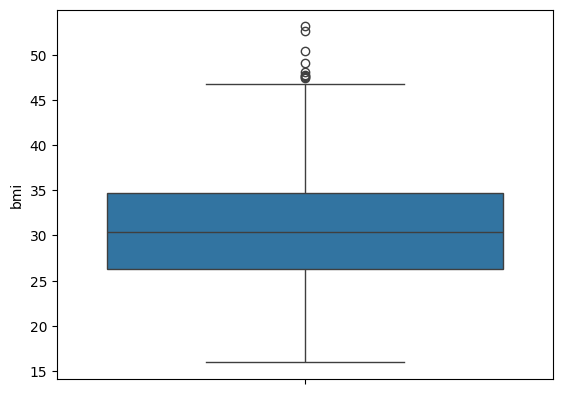

In [19]:
sns.boxplot(medi['bmi'])

In [20]:
medi['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='age', ylabel='bmi'>

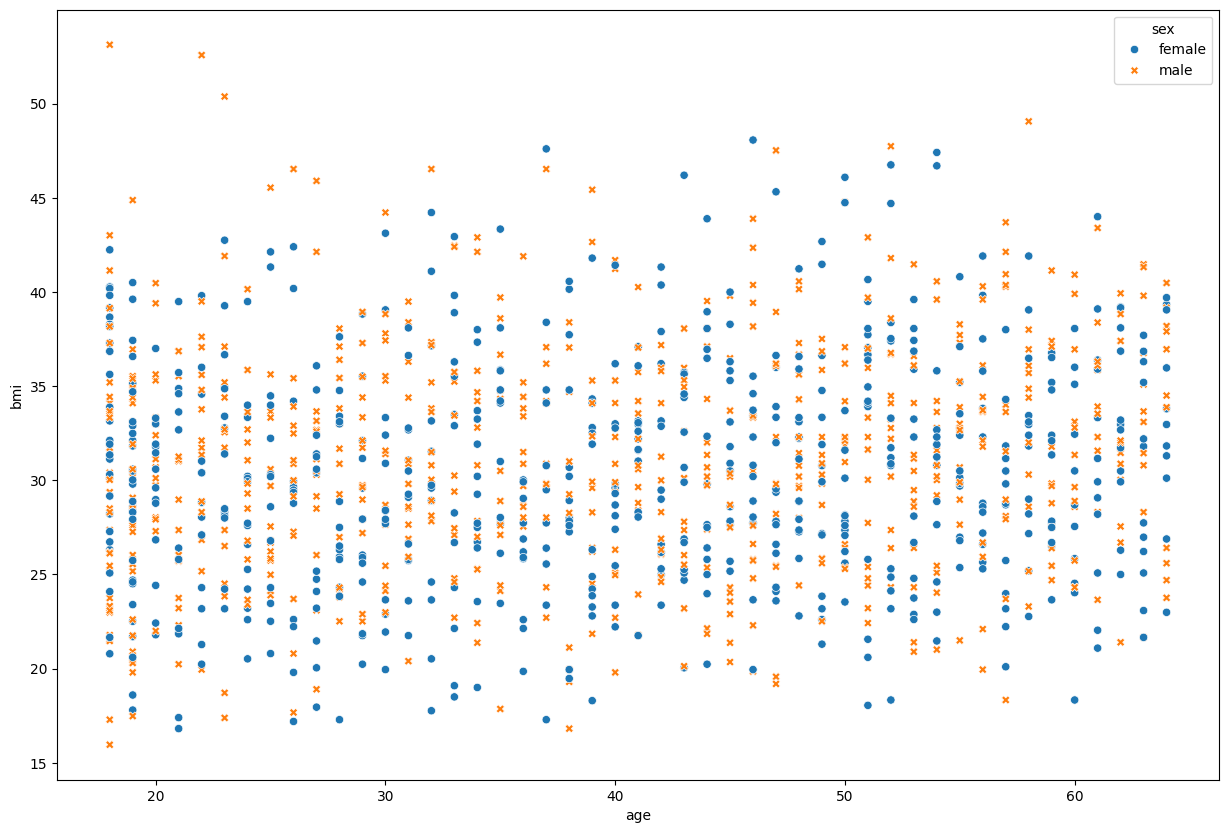

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=medi,x='age',y='bmi',hue='sex',style='sex')

<Axes: xlabel='age', ylabel='charges'>

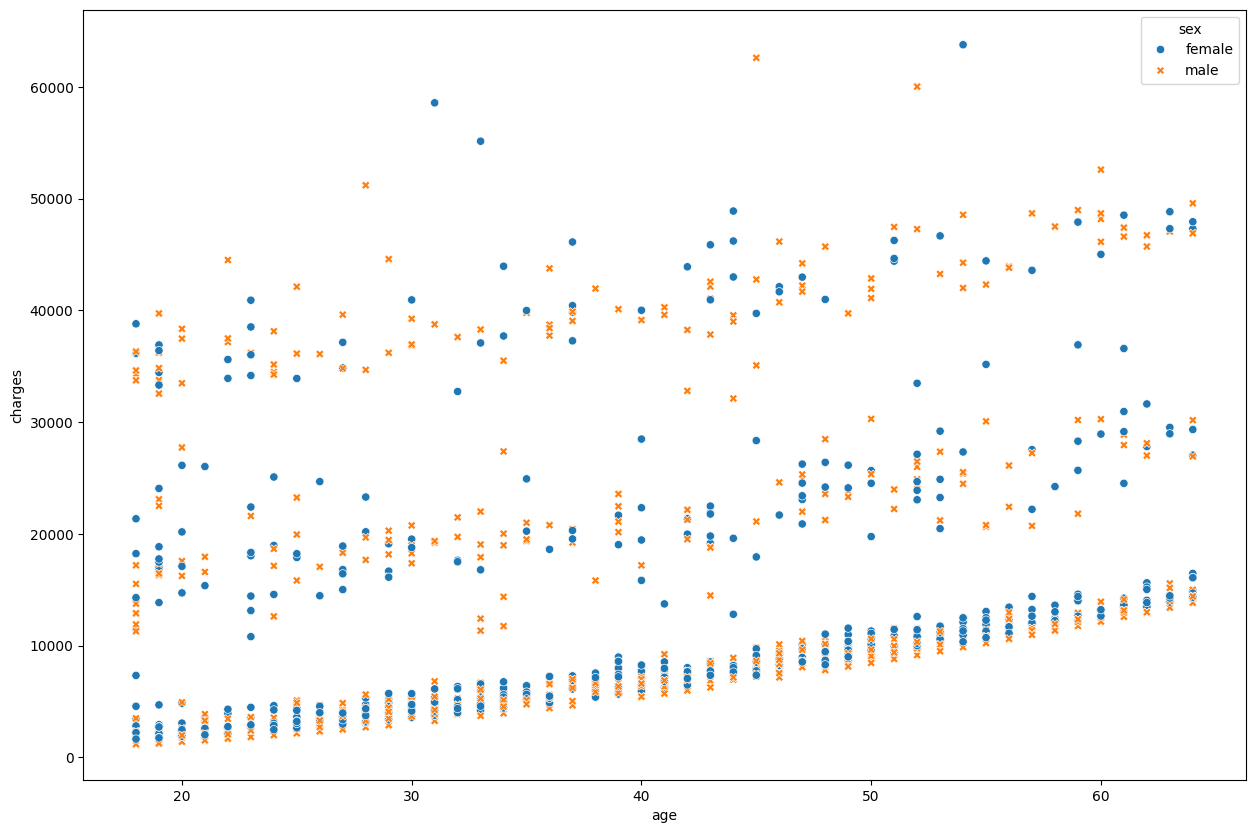

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=medi, x='age',y='charges',hue='sex',style='sex')

<Axes: xlabel='age', ylabel='charges'>

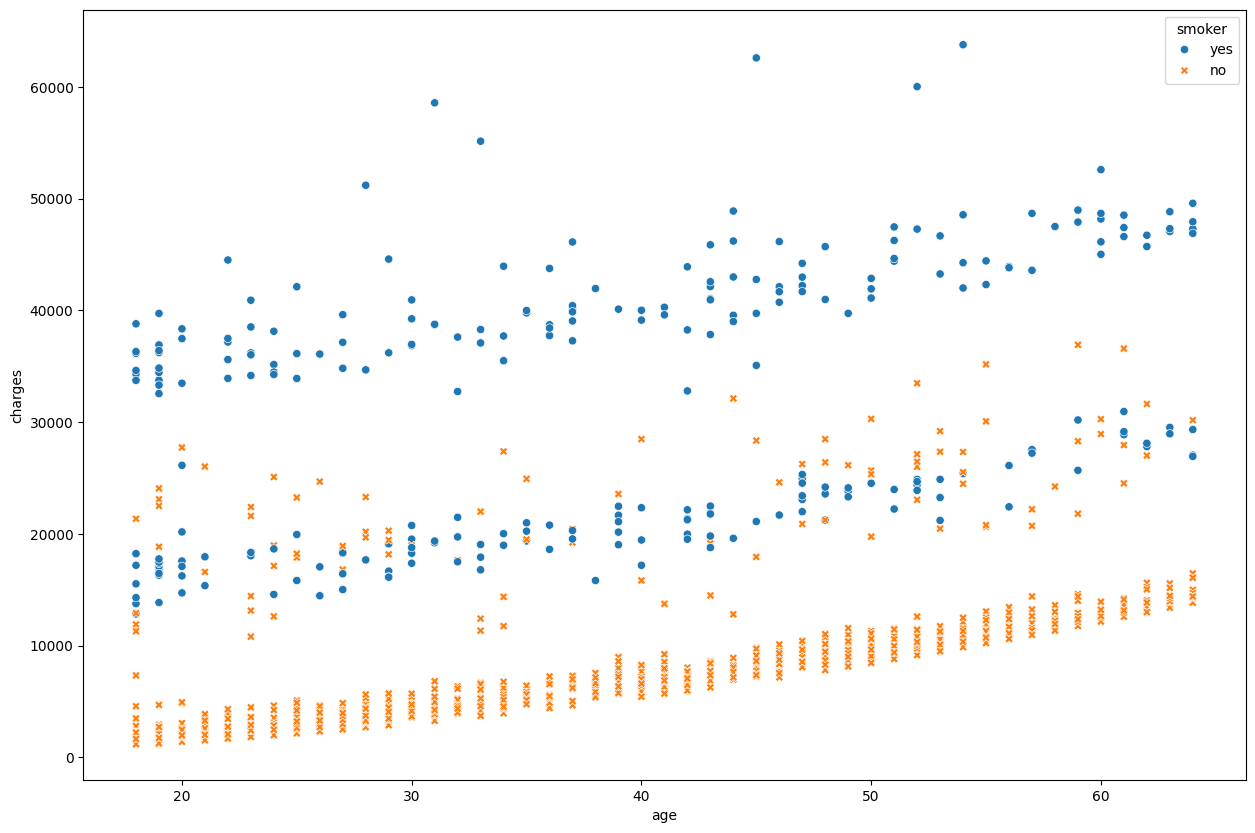

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=medi, x='age',y='charges',hue='smoker',style='smoker')

<Axes: ylabel='bmi'>

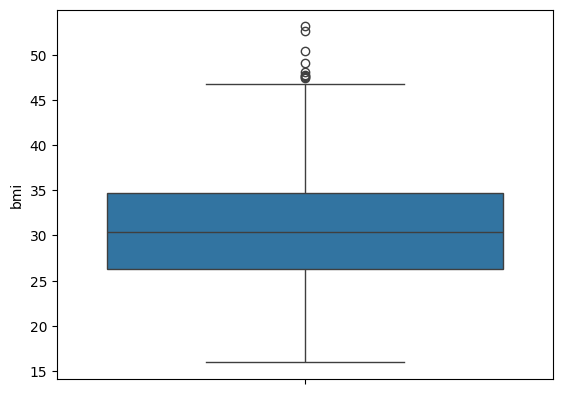

In [26]:
sns.boxplot(medi['bmi'])

In [27]:
medi = medi[medi['bmi'] < 47]
medi.shape

(1329, 7)

In [28]:
medi['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [29]:
medi['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [30]:
medi['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
def label_encoder(feat):
  le = LabelEncoder()
  le.fit(feat)
  print(feat.name,le.classes_)
  return le.transform(feat)

In [33]:
name_list = ['sex','smoker','region']
for name in name_list:
  medi[name] = label_encoder(medi[name])
medi.head(3)

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


<Axes: >

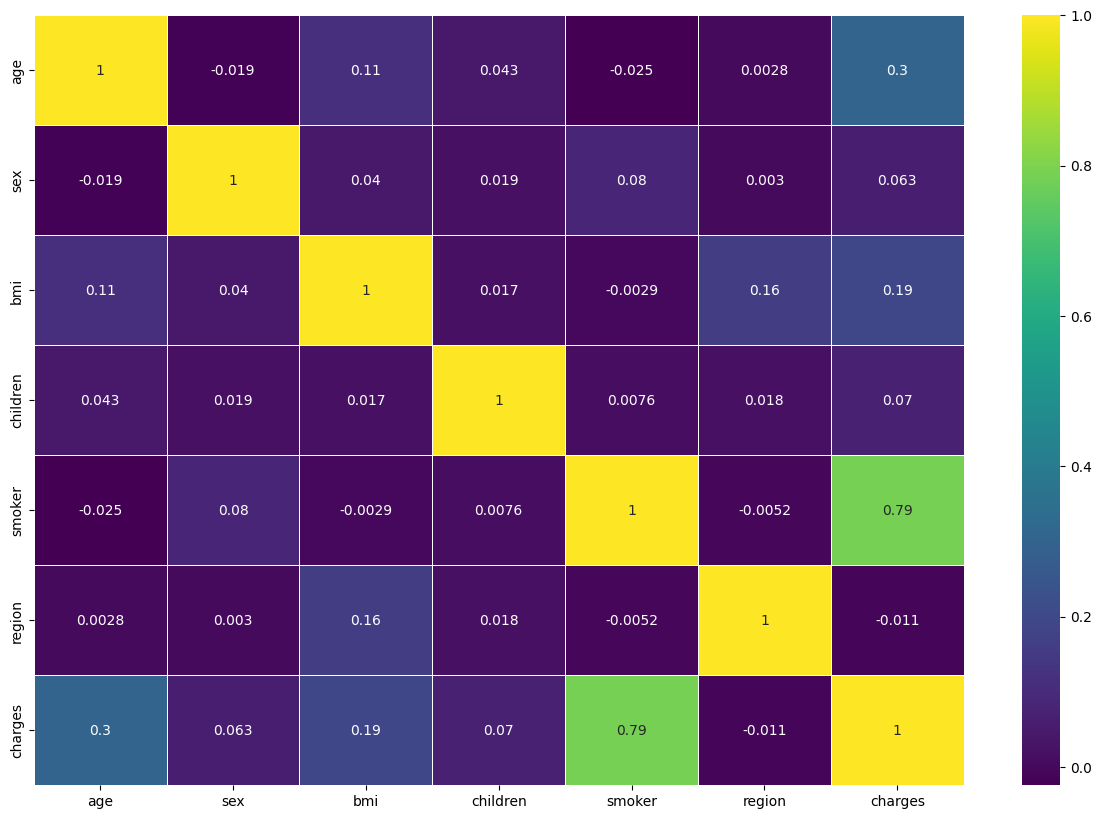

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(medi.corr(),annot=True,cmap='viridis',linewidths=.5)

In [40]:
X = medi.drop(['charges'],axis=1)
y = medi['charges']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
random_model = RandomForestRegressor(n_estimators=250,n_jobs=-1)

In [46]:
random_model.fit(Xtrain,ytrain)
y_pred = random_model.predict(Xtest)

In [48]:
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy,2),'%')

97.63 %


In [49]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1,2),'%')

83.03 %


In [50]:
import pickle
save_model = pickle.dump(random_model,open('medical.pkl','wb'))